# Students Performance in Exams - EDA Analysis

The dataset of this notebook is provided by Kaggle : https://www.kaggle.com/spscientist/students-performance-in-exams. 

# Brief description of dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

Reading data

In [2]:
df = pd.read_csv('datasets/StudentsPerformance.csv')

In [3]:
df.head(n = 5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.shape

(1000, 8)

Modifying the name of the dataset columns

In [6]:
df.rename(columns = lambda column:'_'.join(column.title().split()), inplace = True)

In [7]:
columns = df.columns.tolist()[:5]
for column in columns:
    df[column] = df[column].apply(lambda name:name.title())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       1000 non-null   object
 1   Race/Ethnicity               1000 non-null   object
 2   Parental_Level_Of_Education  1000 non-null   object
 3   Lunch                        1000 non-null   object
 4   Test_Preparation_Course      1000 non-null   object
 5   Math_Score                   1000 non-null   int64 
 6   Reading_Score                1000 non-null   int64 
 7   Writing_Score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
exams = df.columns.tolist()[-3:]

In [12]:
df['Math_Score'] = pd.to_numeric(df['Math_Score'],downcast = 'float')
df['Reading_Score'] = pd.to_numeric(df['Reading_Score'], downcast = 'float')
df['Writing_Score'] = pd.to_numeric(df['Writing_Score'], downcast = 'float')

Finding missings

In [13]:
(df.isna().sum()/df.shape[0])*100

Gender                         0.0
Race/Ethnicity                 0.0
Parental_Level_Of_Education    0.0
Lunch                          0.0
Test_Preparation_Course        0.0
Math_Score                     0.0
Reading_Score                  0.0
Writing_Score                  0.0
dtype: float64

# Descriptive statistics

In [63]:
for col in df.iloc[:,:5]:
    print(col)
    print(df[col].value_counts())
    print()

Gender
Female    518
Male      482
Name: Gender, dtype: int64

Race/Ethnicity
Group C    319
Group D    262
Group B    190
Group E    140
Group A     89
Name: Race/Ethnicity, dtype: int64

Parental_Level_Of_Education
Some College          226
Associate'S Degree    222
High School           196
Some High School      179
Bachelor'S Degree     118
Master'S Degree        59
Name: Parental_Level_Of_Education, dtype: int64

Lunch
Standard        645
Free/Reduced    355
Name: Lunch, dtype: int64

Test_Preparation_Course
None         642
Completed    358
Name: Test_Preparation_Course, dtype: int64



In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Math_Score,1000.0,66.088997,15.163080,0.0,57.00,66.0,77.0,100.0
Reading_Score,1000.0,69.168999,14.600192,17.0,59.00,70.0,79.0,100.0
Writing_Score,1000.0,68.054001,15.195657,10.0,57.75,69.0,79.0,100.0


Descriptive statistics by gender

In [15]:
gender = (df.groupby('Gender')[exams]
          .agg([np.mean, np.std, np.median]))

In [16]:
gender.T

Gender                   Female       Male
Math_Score    mean    63.633205  68.728218
              std     15.491453  14.356277
              median  65.000000  69.000000
Reading_Score mean    72.608109  65.473030
              std     14.378245  13.931832
              median  73.000000  66.000000
Writing_Score mean    72.467178  63.311203
              std     14.844842  14.113832
              median  74.000000  64.000000

In [17]:
gender_keys = (df.groupby(['Gender','Test_Preparation_Course'])[exams])
metrics = [np.mean, np.std, np.median, min, max]
gender_keys.agg(metrics).T

Gender                       Female                    Male           
Test_Preparation_Course   Completed        None   Completed       None
Math_Score    mean        67.195656   61.670658   72.339081  66.688309
              std         14.244347   15.818013   14.221817  14.049016
              median      67.000000   62.000000   73.000000  67.000000
              min         23.000000    0.000000   39.000000  27.000000
              max         99.000000  100.000000  100.000000  97.000000
Reading_Score mean        77.375000   69.982033   70.212646  62.795456
              std         12.695494   14.591730   13.668480  13.375328
              median      78.000000   71.000000   71.000000  63.000000
              min         40.000000   17.000000   37.000000  23.000000
              max        100.000000  100.000000  100.000000  96.000000
Writing_Score mean        78.793480   68.982033   69.793106  59.649349
              std         12.240788   15.016497   12.992339  13.405737
              median      79.000000   70.000000   70.000000  60.000000
              min         36.000000   10.000000   38.000000  15.000000
              max        100.000000  100.000000  100.000000  92.000000

In [18]:
(df.groupby(['Race/Ethnicity', 'Parental_Level_Of_Education'])
 [exams]).agg(np.mean)

Math_Score  Reading_Score  \
Race/Ethnicity Parental_Level_Of_Education                              
Group A        Associate'S Degree            61.000000      67.071426   
               Bachelor'S Degree             67.166664      68.083336   
               High School                   60.444443      62.888889   
               Master'S Degree               57.666668      64.666664   
               Some College                  63.888889      65.777779   
               Some High School              58.916668      62.083332   
Group B        Associate'S Degree            66.097565      69.585365   
               Bachelor'S Degree             69.300003      72.949997   
               High School                   59.791668      63.458332   
               Master'S Degree               67.166664      80.166664   
               Some College                  63.189190      65.756760   
               Some High School              61.815788      66.447365   
Group C        Associate'S Degree            66.730766      71.128204   
               Bachelor'S Degree             68.150002      75.675003   
               High School                   60.906250      64.421875   
               Master'S Degree               67.052635      70.526314   
               Some College                  65.130432      69.420288   
               Some High School              60.551022      65.632652   
Group D        Associate'S Degree            67.599998      70.540001   
               Bachelor'S Degree             67.571426      70.142860   
               High School                   62.863636      64.409088   
               Master'S Degree               72.521736      77.173912   
               Some College                  68.731346      70.880600   
               Some High School              66.760002      69.980003   
Group E        Associate'S Degree            74.897438      73.820511   
               Bachelor'S Degree             76.555557      74.833336   
               High School                   70.772728      70.318184   
               Master'S Degree               74.625000      82.125000   
               Some College                  73.828575      72.628571   
               Some High School              72.111115      69.555557   

                                            Writing_Score  
Race/Ethnicity Parental_Level_Of_Education                 
Group A        Associate'S Degree               63.571430  
               Bachelor'S Degree                68.333336  
               High School                      60.500000  
               Master'S Degree                  67.666664  
               Some College                     65.000000  
               Some High School                 58.583332  
Group B        Associate'S Degree               68.243904  
               Bachelor'S Degree                71.650002  
               High School                      61.250000  
               Master'S Degree                  77.166664  
               Some College                     64.189186  
               Some High School                 64.605263  
Group C        Associate'S Degree               70.269234  
               Bachelor'S Degree                75.900002  
               High School                      61.656250  
               Master'S Degree                  69.526314  
               Some College                     68.869568  
               Some High School                 63.285713  
Group D        Associate'S Degree               69.860001  
               Bachelor'S Degree                71.892860  
               High School                      63.159092  
               Master'S Degree                  79.739128  
               Some College                     71.701492  
               Some High School                 69.099998  
Group E        Associate'S Degree               73.205132  
               Bachelor'S Degree                75.388885  
               High School 

In [19]:
df['Total_Score'] = df['Math_Score']+df['Reading_Score']+df['Writing_Score']

# Visualization

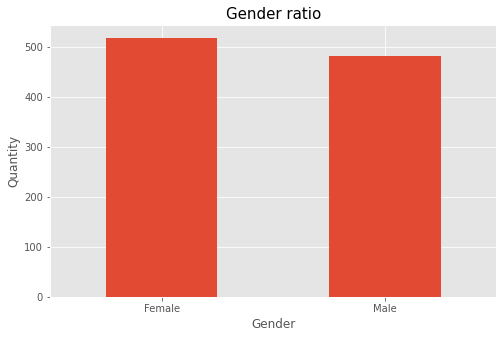

In [20]:
df['Gender'].value_counts().plot(kind = 'bar', figsize = (8, 5))
plt.title('Gender ratio', fontsize= 15)
plt.xlabel('Gender')
plt.xticks([0, 1], ['Female', 'Male'], rotation = 0)
plt.ylabel('Quantity');

Text(0.5, 1.0, 'Race/Ethnicity groups')

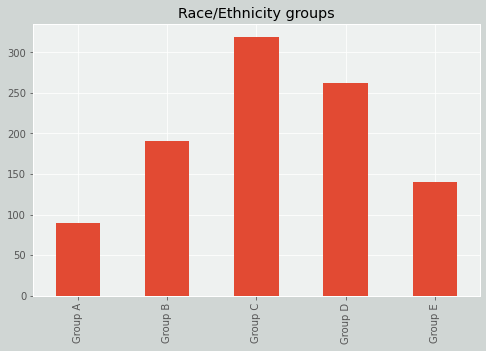

In [74]:
plt.figure(figsize = (8, 5))
df['Race/Ethnicity'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Race/Ethnicity groups')

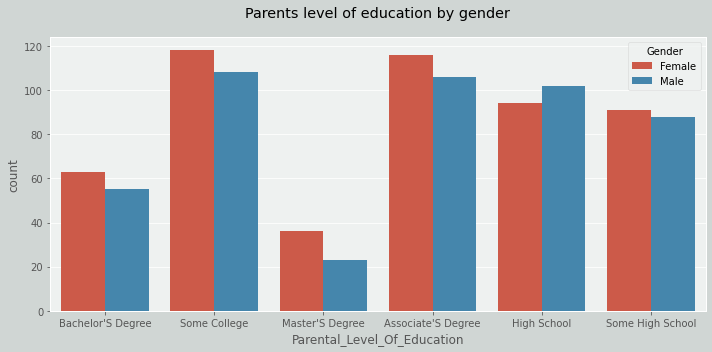

In [81]:
plt.figure(figsize = (10, 5))
sns.countplot(
    data = df,
    x = 'Parental_Level_Of_Education',
    hue= 'Gender'
)
plt.title('Parents level of education by gender', pad = 20)
plt.tight_layout()

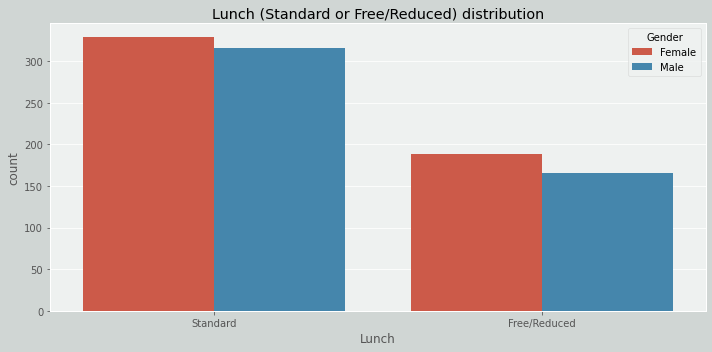

In [84]:
plt.figure(figsize = (10, 5))
sns.countplot(
    data = df,
    x = 'Lunch',
    hue = 'Gender'
)
plt.title('Lunch (Standard or Free/Reduced) distribution')
plt.tight_layout()

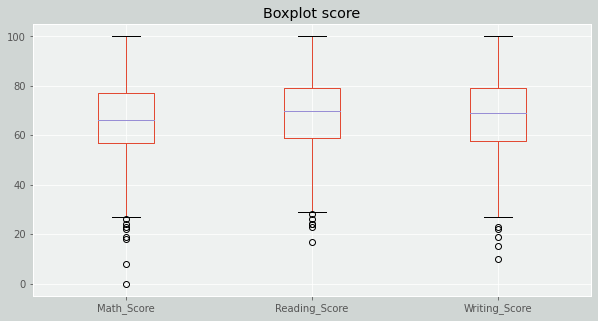

In [88]:
df[exams].plot(kind = 'box', figsize = (10,5))
plt.title('Boxplot score');

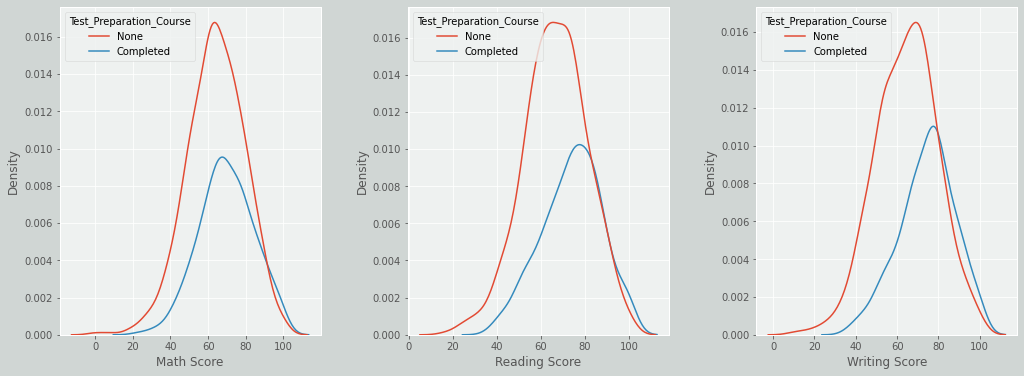

In [204]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, figsize = (15,6))

sns.kdeplot(data = df, x = 'Math_Score', hue = 'Test_Preparation_Course', ax = ax0)
ax0.set_xlabel('Math Score')

sns.kdeplot(data = df, x = 'Reading_Score', hue = 'Test_Preparation_Course', ax = ax1)
ax1.set_xlabel('Reading Score')

sns.kdeplot(data = df, x = 'Writing_Score', hue = 'Test_Preparation_Course', ax = ax2)
ax2.set_xlabel('Writing Score')

plt.tight_layout(pad = 3.5)

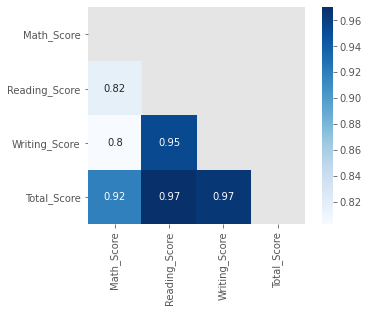

In [28]:
correlation_matrix = df.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    correlation_matrix,
    annot = True,
    mask = mask,
    square = True,
    cmap = 'Blues');

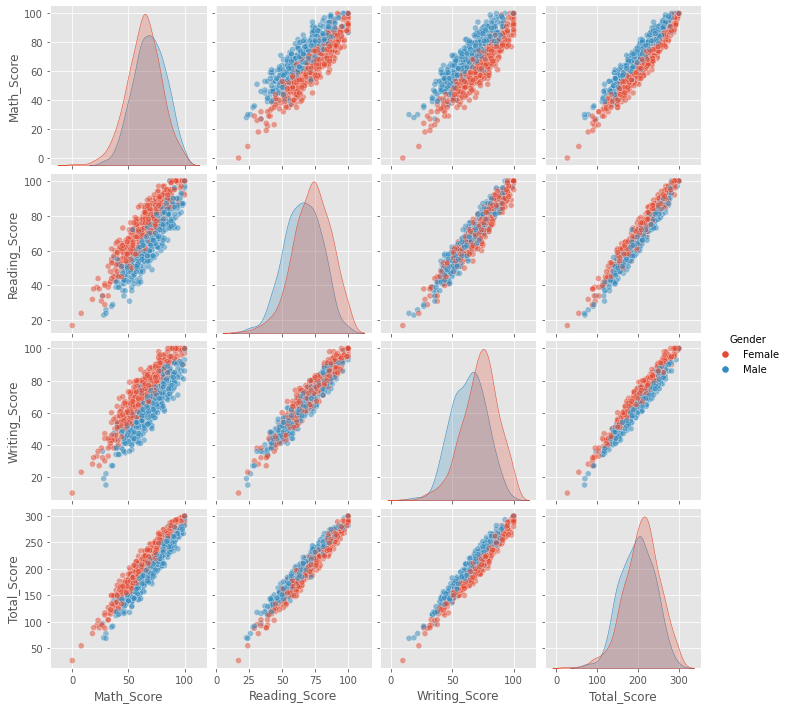

In [43]:
sns.pairplot(df, hue = 'Gender', plot_kws = {'alpha':0.5});

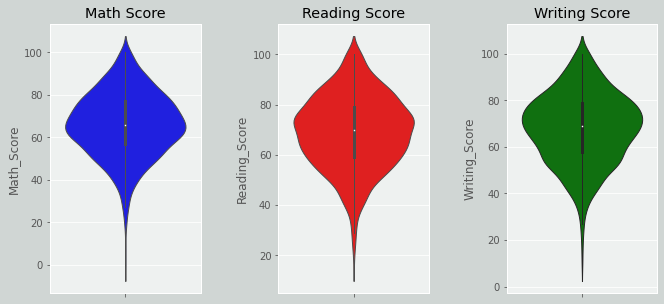

In [45]:
plt.rcParams['axes.facecolor'] = '#EEF1F0'
plt.rcParams['figure.facecolor'] ="#D0D6D4"

fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, constrained_layout = False, figsize = (10, 5))

sns.violinplot(data = df, y = 'Math_Score', color = 'blue', linewidth=1, ax = ax0)
ax0.set_title('Math Score')

sns.violinplot(data = df, y = 'Reading_Score', color = 'red', linewidth = 1, ax = ax1)
ax1.set_title('Reading Score')

sns.violinplot(data = df, y = 'Writing_Score', color = 'green', linewidth = 1, ax = ax2)
ax2.set_title('Writing Score')

plt.tight_layout(pad = 3.5)


# Machine Learning Model

In [205]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import (LinearRegression, 
                                  Ridge, 
                                  ElasticNet, 
                                  Lasso)
from sklearn.model_selection import (GridSearchCV, 
                                     train_test_split, 
                                     KFold,
                                     cross_val_score)

### Handling Categorical Data

In [143]:
df1 = df.copy()

In [145]:
for col in df1.columns.values[:5]:
    df1[col] = ord_encoder.fit_transform(df1[col].values.reshape(-1,1))

### Building a Linear Regression Model

In [165]:
x = df1.drop(columns = ['Total_Score', 'Math_Score'], axis = 1)
y = df1['Math_Score']

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [172]:
x_train.shape, y_train.shape

((700, 7), (700,))

In [173]:
x_test.shape, y_test.shape

((300, 7), (300,))

Kfold

In [ ]:
kfold()

In [179]:
kfold = KFold(n_splits = 8)
linear_regression = LinearRegression()
results = cross_val_score(linear_regression, x, y, cv = kfold)

In [183]:
results.mean(),results

(0.8622111999740898,
 array([0.89769088, 0.8397162 , 0.8617814 , 0.85058885, 0.85589758,
        0.86044418, 0.86782487, 0.86374565]))

Linear Regression

In [184]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [185]:
predictions = linear_regression.predict(x_test)

In [191]:
linear_regression.score(x_test, y_test)

0.8610201658478558

In [187]:
linear_regression.coef_

array([12.76009497,  0.97740954,  0.01375936,  4.03223429,  3.04005307,
        0.34885125,  0.6001611 ])

Metrics

MAE

In [192]:
metrics.mean_absolute_error(y_test, predictions)

4.489929429631857

MSE

In [195]:
metrics.mean_squared_error(y_test, predictions)

31.253876053640937

RMSE

In [196]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

5.590516617777014

R2

In [197]:
metrics.r2_score(y_test, predictions)

0.8610201658478558

## Gradient Boosting

In [199]:
grad_model = GradientBoostingRegressor(n_estimators = 300, max_depth = 5)

In [200]:
grad_model.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=300)

In [201]:
grad_predictions = grad_model.predict(x_test)

R2

In [202]:
metrics.r2_score(y_test, grad_predictions)

0.8121828399635753

## Other models

In [206]:
kfold = KFold(n_splits = 10)
lasso = Lasso()
ridge = Ridge()
elastic_net = ElasticNet()
results_lasso = cross_val_score(lasso, x, y, cv = kfold)
results_ridge = cross_val_score(ridge, x, y, cv = kfold)
results_elastic_net = cross_val_score(elastic_net, x, y, cv = kfold)

In [207]:
dic_models = {
    'Lasso': results_lasso.mean(),
    'Ridge':results_ridge.mean(),
    'ElasticNet':results_elastic_net.mean()}

In [211]:
for model, score in dic_models.items():
    print(model,score)

Lasso 0.8158684869356538
Ridge 0.861656513398749
ElasticNet 0.7495709275516369
